Question 5

In [1]:
## load data from scikit
import numpy as np
import pandas as pd
import sklearn
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier # neural network
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
## load data
iris_dataset = load_iris()
## split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], test_size=0.20, random_state=0)

In [3]:
def find_network_size(X_train, y_train): # similar to tut 10
  acc_train_array = []
  acc_valid_array = []
  for Nhidd in range(1,11):
    acc_train_array_fold = []
    acc_valid_array_fold = []
    ## Random permutation of data
    Idx = np.random.RandomState(seed=8).permutation(len(y_train))
    ## Tuning: perform 5-fold cross-validation on the training set to determine the best network size
    for k in range(0,5):
      N = np.around((k+1)*len(y_train)/5)
      N = N.astype(int) # 24 each fold
      Xvalid = X_train[Idx[N-24:N]] # validation features
      Yvalid = y_train[Idx[N-24:N]] # validation targets
      Idxtrn = np.setdiff1d(Idx, Idx[N-24:N]) # rest of the data as training
      Xtrain = X_train[Idxtrn] # training features in tuning loop
      Ytrain = y_train[Idxtrn] # training targets in tuning loop
      ## MLP Classification with same size for each hidden-layer (specified in question)
      clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(Nhidd,Nhidd,Nhidd), random_state=1)
      clf.fit(Xtrain, Ytrain)
      ## trained output
      y_est_p = clf.predict(Xtrain) # traning set
      acc_train_array_fold += [metrics.accuracy_score(y_est_p,Ytrain)] ## validation output
      yt_est_p = clf.predict(Xvalid) # validation set
      acc_valid_array_fold += [metrics.accuracy_score(yt_est_p,Yvalid)]
    acc_train_array += [np.mean(acc_train_array_fold)]
    acc_valid_array += [np.mean(acc_valid_array_fold)]
  ## find the size that gives the best validation accuracy
  Nhidden = np.argmax(acc_valid_array,axis=0)+1
  ## plotting
  hiddensize = [x for x in range(1,11)]
  plt.plot(hiddensize, acc_train_array, color='blue', marker='o', linewidth=3, label='Training')
  plt.plot(hiddensize, acc_valid_array, color='orange', marker='x', linewidth=3,
  label='Validation')
  plt.xlabel('Number of hidden nodes in each layer')
  plt.ylabel('Accuracy')
  plt.title('Training and Validation Accuracies')
  plt.legend()
  plt.show()
  return Nhidden


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS R

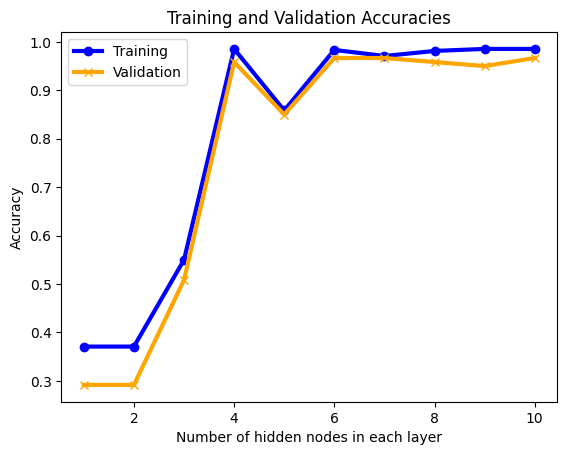

best hidden node size = 6 based on 5-fold cross-validation on training set


In [4]:
## find the best hidden node size using only the training set
Nhidden = find_network_size(X_train, y_train)
print('best hidden node size =', Nhidden, 'based on 5-fold cross-validation on training set')

In [5]:
## perform evaluation
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(Nhidden,Nhidden,Nhidden), random_state=1)
clf.fit(X_train, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(6, 6, 6), random_state=1,
              solver='lbfgs')

In [6]:
## trained output
y_test_predict = clf.predict(X_test)
test_accuracy = metrics.accuracy_score(y_test_predict,y_test)
print('test accuracy =', test_accuracy)

test accuracy = 1.0
